#Unsupervised learning (Kohonen network)

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('The user has loaded the data file "{name}" with a length of {length} bits'.format(
      name=fn, length=len(uploaded[fn])))

Saving heart.csv to heart.csv
The user has loaded the data file "heart.csv" with a length of 38114 bits


#Attribute Information

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [3]:
#Loading data
dataset = pd.read_csv('heart.csv')

In [4]:
import matplotlib.pyplot as plt

(1025, 14)
   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   52    1   0       125   212    0  ...      0      1.0      2   2     3       0
1   53    1   0       140   203    1  ...      1      3.1      0   0     3       0
2   70    1   0       145   174    0  ...      1      2.6      0   0     3       0
3   61    1   0       148   203    0  ...      0      0.0      2   1     3       0
4   62    0   0       138   294    1  ...      0      1.9      1   3     2       0
5   58    0   0       100   248    0  ...      0      1.0      1   0     2       1
6   58    1   0       114   318    0  ...      0      4.4      0   3     1       0
7   55    1   0       160   289    0  ...      1      0.8      1   1     3       0
8   46    1   0       120   249    0  ...      0      0.8      2   0     3       0
9   54    1   0       122   286    0  ...      1      3.2      1   2     2       0

[10 rows x 14 columns]
               age          sex  ...         thal   

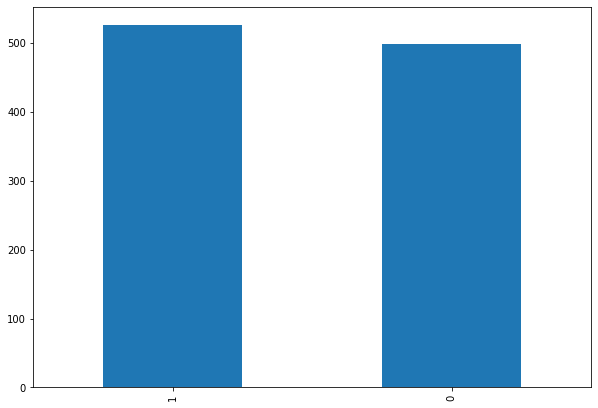

In [5]:
#Columns and rows in the data
print(dataset.shape)
#Top 10 rows
print(dataset.head(10))
#Main data matrices
print(dataset.describe())
#Class distribution
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
print(dataset.groupby('target').size())
dataset['target'].value_counts().plot.bar()

In [6]:
print('The proportion of classes:')
print(dataset['target'].value_counts() / len(dataset))

The proportion of classes:
1    0.513171
0    0.486829
Name: target, dtype: float64


In [7]:
#Data types
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [8]:
#Number of missing data points per column
missing_values_count = dataset.isnull().sum()
print(missing_values_count)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


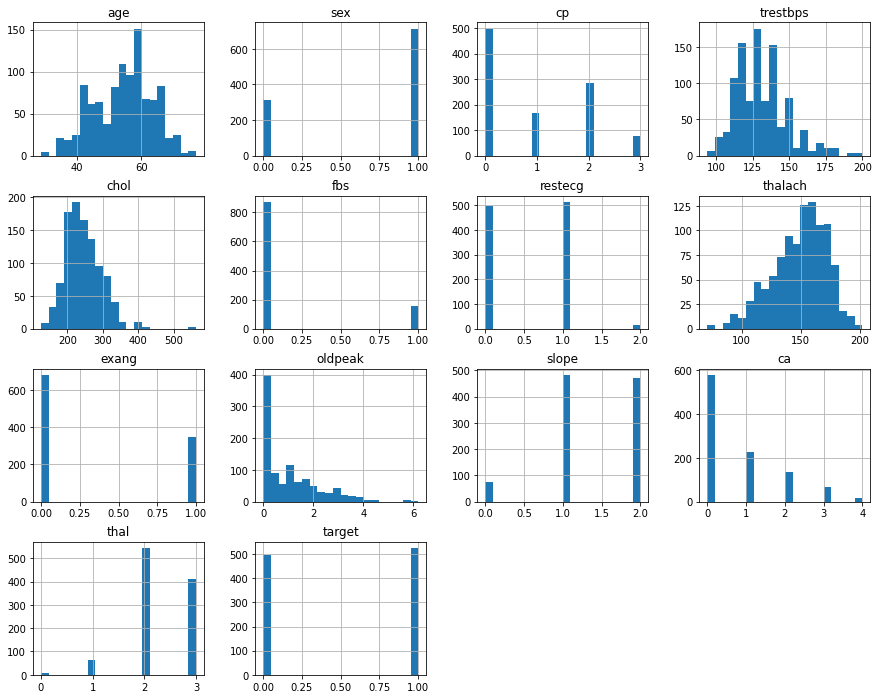

In [9]:
#Histograms
dataset.hist(figsize=(15,12),bins = 20)
plt.title("Distribution features")
plt.show()

#Pre-processing of data

In [10]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [11]:
print (X.shape, y.shape)

(1025, 13) (1025,)


In [12]:
##The function scales the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [ ]:
#The second of the data scaling algorithms
#from sklearn.preprocessing import MinMaxScaler
#sc_X = MinMaxScaler(feature_range = (0, 1))
#X = sc_X.fit_transform(X)

#Construction of the Kohonen network

In [13]:
#Installation of MiniSom - Kohonen Network library
! pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8592 sha256=ec220fb195b5d96cc7ba43c882140d148289ee1bc6c5851e98f1e96a0026e052
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


In [14]:
#Network size (x,y), input vector = 13, sigma (8,8) = 1.0; sigma (16,16) = 1.3;
from minisom import MiniSom
som = MiniSom(x = 16, y = 16, input_len = 13, sigma = 1.3, learning_rate = 0.5)
som.random_weights_init(X) #starting a network with random weights

In [15]:
print ("Kohonen network initialization")
som.train_random(data = X, num_iteration = 5000) #number of iterations during training
print ("...\nProcessing complete")

Kohonen network initialization
...
Processing complete


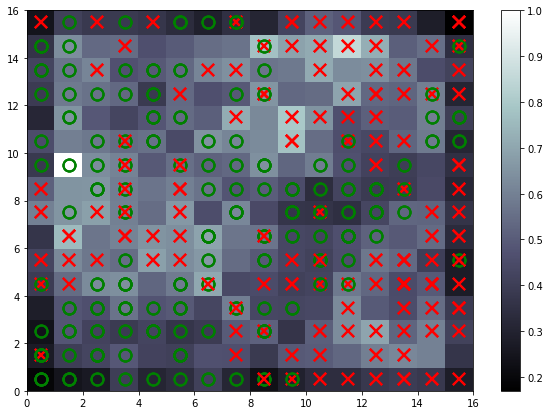

In [16]:
from pylab import axis, bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()

y[y == 0] = 0
y[y == 1] = 1
markers = ['x', 'o']
colors = ['r', 'g']
for i, xx in enumerate(X):
    w = som.winner(xx)
    plot(w[0] + 0.5, w[1] + 0.5, 
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 12,
         markeredgewidth = 2)
axis([0, som.get_weights().shape[0],0,som.get_weights().shape[1]])
show()

#Definition of classification

In [17]:
#Assigning map to classes
class_assignments = som.labels_map(X, y)

In [18]:
#Defined classification function based on Kohonen's map
def classify(som, data, class_assignments):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i]. """
    winmap = class_assignments
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [19]:
#Division of the set
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(768, 13) (257, 13) (768,) (257,)


#Analysis of the results

In [20]:
#Predict test suite results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
class_assignments = som.labels_map(X_train, y_train)
print(classification_report(y_test, classify(som, X_test, class_assignments)))

#y_pred = model.predict(X_test)
#y_pred = (y_pred>0.5) #Because the output is a probability
cm = confusion_matrix(y_test, classify(som, X_test, class_assignments))
accuracy = accuracy_score(y_test, classify(som, X_test, class_assignments))
print("Classification (Kohonen network):")
print("Accuracy = ", accuracy)
print(cm)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       123
           1       0.89      0.93      0.91       134

    accuracy                           0.90       257
   macro avg       0.90      0.90      0.90       257
weighted avg       0.90      0.90      0.90       257

Classification (Kohonen network):
Accuracy =  0.9027237354085603
[[108  15]
 [ 10 124]]
